<h1>Student Acedemic Performance</h1>

In this notebook we will carry out data visualization of the student acedemic performance dataset

<h3>Importing dataset and libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [2]:
df= pd.read_csv("/kaggle/input/student-performance/StudentPerformance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


<h1>Getting information regarding data</h1>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


We can see the average a student has studied is around 5 hours 

<h3>Plotting graph for Performance with and without Extracurricular Activities </h3>

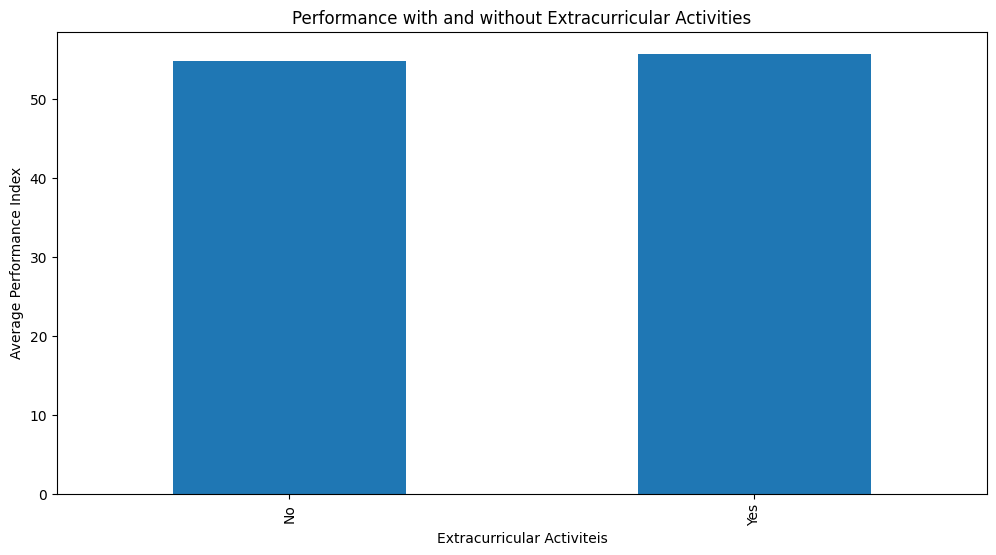

In [6]:
avg_perf=df.groupby("Extracurricular Activities")["Performance Index"].mean()

plt.figure(figsize=(12,6))
avg_perf.plot(kind="bar")
plt.xlabel("Extracurricular Activiteis")
plt.ylabel("Average Performance Index")
plt.title("Performance with and without Extracurricular Activities")
plt.show()

As we can see there is not much diffrence with/without extracurricular activities

<h3>Plotting graph for students who studies>5 hour and sleep>=6 hours vs others</h3>

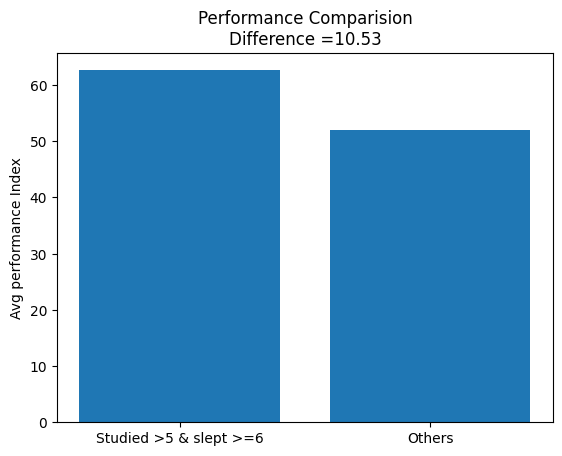

In [10]:
group_good=df[(df['Hours Studied']>5) & (df["Sleep Hours"]>=6)]
group_other=df[~((df["Hours Studied"]>5) & (df["Sleep Hours"]>=6))]

avg_good = group_good["Performance Index"].mean()
avg_other= group_other["Performance Index"].mean()

difference= avg_good - avg_other

plt.figure()
plt.bar(
    ["Studied >5 & slept >=6","Others"],
    [avg_good, avg_other]
)

plt.ylabel("Avg performance Index")
plt.title(f"Performance Comparision\nDifference ={difference:.2f}")
plt.show()

<h3>Analysing performance index with sleep and deep hours of study </h3>

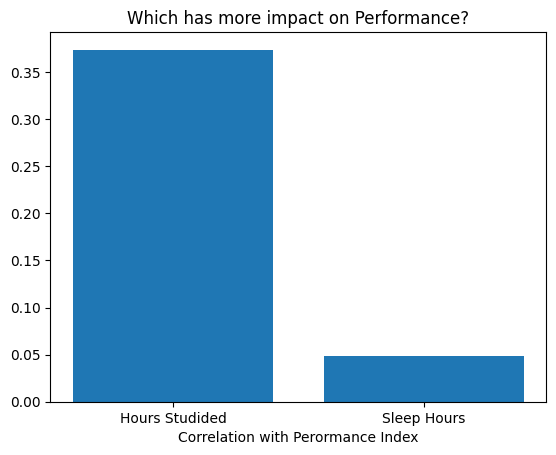

In [13]:
corr_study = df["Hours Studied"].corr(df["Performance Index"])
corr_sleep = df["Sleep Hours"].corr(df["Performance Index"])

plt.figure()
plt.bar(
    ["Hours Studided","Sleep Hours"],
    [corr_study, corr_sleep]
)

plt.xlabel("Correlation with Perormance Index")
plt.title("Which has more impact on Performance?")
plt.show()

We can see that Hour studied has most impact on performance which is obvious

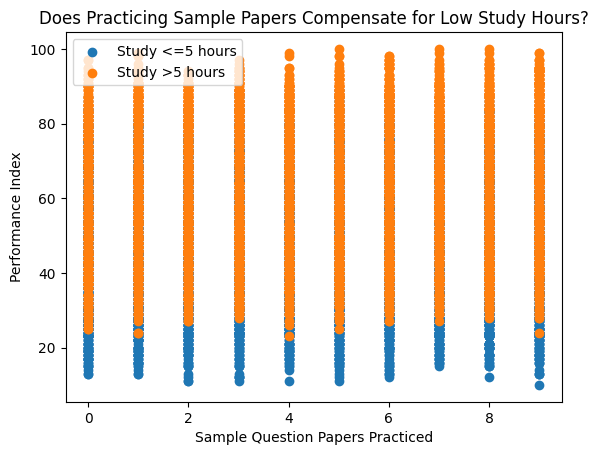

In [20]:
low_study= df[df["Hours Studied"] <=5]
high_Study=df[df["Hours Studied"]>5]

plt.figure()
plt.scatter(
    low_study["Sample Question Papers Practiced"],
    low_study["Performance Index"],
    label= "Study <=5 hours"
)

plt.scatter(
    high_Study["Sample Question Papers Practiced"],
    high_Study["Performance Index"],
    label= "Study >5 hours"
)

plt.xlabel("Sample Question Papers Practiced")
plt.ylabel("Performance Index")
plt.title("Does Practicing Sample Papers Compensate for Low Study Hours?")
plt.legend()
plt.show()

We can see that solving pyq does not have any significant effect on the outcome 

<h3>Distribution of students acrosss different hours of sleep</h3>

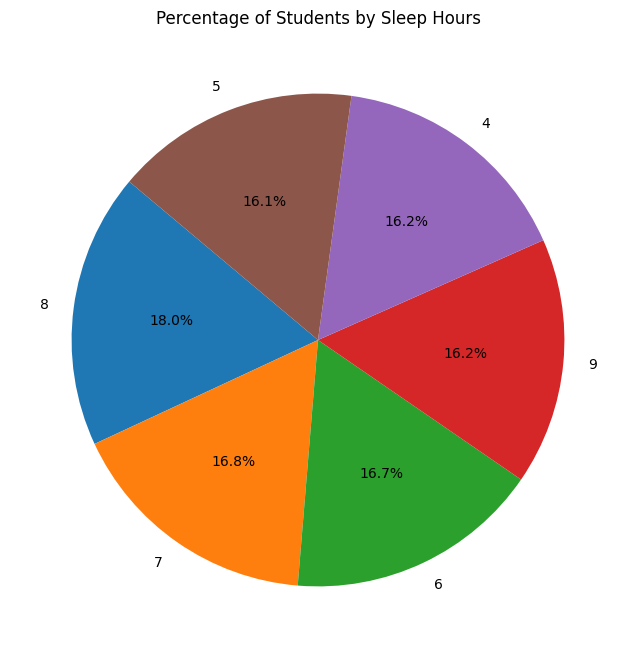

In [25]:
sleep_counts = df['Sleep Hours'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sleep_counts, labels=sleep_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Students by Sleep Hours')
plt.show()


we can see most students's distribution is almost ssleep_counts = df['Sleep Hours'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(sleep_counts, labels=sleep_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Students by Sleep Hours')
plt.show()ame in every hour

<h3>Distribution of students acrosss differnet study hours </h3>

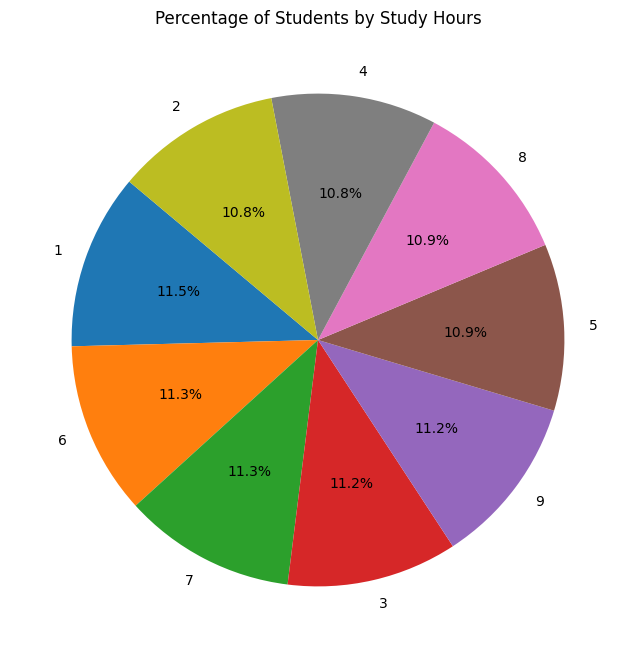

In [27]:
study_counts=df['Hours Studied'].value_counts()
plt.figure(figsize=(12,8))
plt.pie(study_counts, labels=study_counts.index, autopct='%1.1f%%',startangle=140)
plt.title("Percentage of Students by Study Hours")
plt.show()

We can see that around the same % of children studied different hours and it is a almost equal distribution

<h1>===Here, we conclude our analysis===</h1>